### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\14239\Downloads\us-states.json'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\14239\Downloads\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
# Define Path

path = r'C:\Users\14239\Downloads\Personal'

In [7]:
# Import Data

df = pd.read_csv(os.path.join(path, 'Live_Ball_Era_Clean.csv'), index_col = False)

### 2. No Additional Wrangling Needed

### 3. Conduct Consistency Checks

In [8]:
# Check for missing values

df.isnull().sum()

Unnamed: 0    0
Season        0
Name          0
Abrv          0
City          0
State         0
Team          0
G             0
PA            0
HR            0
R             0
RBI           0
SB            0
BB%           0
K%            0
ISO           0
BABIP         0
AVG           0
OBP           0
SLG           0
OPS           0
wOBA          0
wRC+          0
BsR           0
Off           0
Def           0
WAR           0
playerid      0
dtype: int64

No missing values

In [9]:
dups = df.duplicated()

In [11]:
dups.shape

(11562,)

No duplicates

<AxesSubplot:xlabel='AVG', ylabel='Count'>

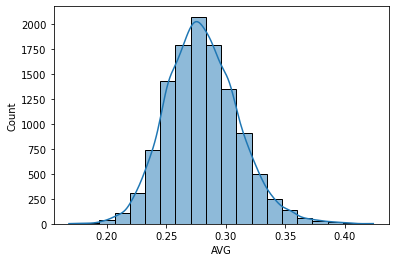

In [17]:
sns.histplot(df['AVG'], bins=20, kde = True) # shows extreme values for 'HR'

No extreme values

In [16]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['State', 'AVG'],
    key_on = 'feature.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "AVG").add_to(map)
folium.LayerControl().add_to(map)

map

This analysis confirms some well known asumptions within baseball circles. Certain ballparks such as Coors Field in Denver, Citizens Bank Park in Philadelphia, and PNC Park in Pittsburgh are known as good "hitter's parks." This analysis confirms that by showing that the states of Colorado and Pennsylvania have consistent has hitters with higher AVG in the live ball era.

This does lead me to some other questions about geography as a measure of success and will likely prompt me to explore how other statistics are affected by the home ballpark.